In [3]:
import numpy as np
from matplotlib import pyplot as plt
from configs import configs, train_config
from utils import legend_without_duplicate_labels
import glob
from pathlib import Path
import pandas as pd
from matplotlib.ticker import MaxNLocator
import json
from matplotlib import colormaps
import math
from label_lines import *
import pickle

In [4]:
linestyles={}
for _, (config, params) in enumerate(configs.items()):
    if '{\perp}' in config:
        linestyles[config] = '--'
    else:
        linestyles[config] = '-'

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1940530/1068540867.py:3: SyntaxWarning: invalid escape sequence '\p'
  if '{\perp}' in config:


In [5]:
colors = colormaps['tab20'].colors

In [6]:
colors_idx={'A':0, 'A(X)':0,
        '$A^{\perp}$':1, '$A(X)^{\perp}$':1,
        '$A^{\perp}$ + skip': 3, '$A(X)^{\perp}$ + skip':3,
        '$A^{\perp}$ + LN': 5, '$A(X)^{\perp}$ + LN':5,
        '$A^{\perp}$ + upscaled skip': 8, '$A(X)^{\perp}$ + upscaled skip':8,
        '$A^{\perp}$ + skip + LN': 7, '$A(X)^{\perp}$ + skip + LN':7,
        '$A^{\perp}$ + upscaled skip + LN': 11, '$A(X)^{\perp}$ + upscaled skip + LN':11,
        'A + LN':4, 'A(X) + LN':4,
        'A + skip':2, 'A(X) + skip':2,
        'A + upscaled skip':9, 'A(X) + upscaled skip':9,
        'A + skip + LN':6, 'A(X) + skip + LN':6,
        'A + upscaled skip + LN':10, 'A(X) + upscaled skip + LN':10,
        'Identity A': 12,
        }

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'


In [5]:
# colors_idx={'A':'blue', 'A(X)':'blue',
#         '$A^{\perp}$':'red', '$A(X)^{\perp}$':'red',
#         '$A^{\perp}$ + skip': 'purple', '$A(X)^{\perp}$ + skip':'purple',
#         '$A^{\perp}$ + LN': 'tomato', '$A(X)^{\perp}$ + LN':'tomato',
#         '$A^{\perp}$ + upscaled skip': 'olive', '$A(X)^{\perp}$ + upscaled skip':'olive',
#         '$A^{\perp}$ + skip + LN': 'hotpink', '$A(X)^{\perp}$ + skip + LN':'hotpink',
#         '$A^{\perp}$ + upscaled skip + LN': 'fuchsia', '$A(X)^{\perp}$ + upscaled skip + LN':'fuchsia',
#         'A + LN':'orange', 'A(X) + LN':'orange',
#         'A + skip':'green', 'A(X) + skip':'green',
#         'A + upscaled skip':'silver', 'A(X) + upscaled skip':'silver',
#         'A + skip + LN':'deepskyblue', 'A(X) + skip + LN':'deepskyblue',
#         'A + upscaled skip + LN':'palegreen', 'A(X) + upscaled skip + LN':'palegreen',
#         'Identity A': 'black',
#         }

In [7]:
exp_name = '+XqTe1VBl1pJT2nAEXHaxNNxCJPfZmvynFDtZpbPEw0='
# 1 layer T = 500 normal with good lr grid shifted expanded sigmoid MnvUcS+TP0uNa9ywqZxPSwUEHdL7J2Q08HgBAUjmHGE=
# 5 layer T = 500 normal with good lr grid shifted expanded sigmoid zkxDSPTWN0tomzLQ25TIIOv6M7R4NGwRVHQrQa13S3Y=

# 2 layer T = 500 normal with good lr grid VllxusmteXmexaUqGJnl+SyfTw3E27ibq6xlcsX7CqU=
# 5 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid BYKf0aI1sYmQeFcRiS0z7bsWQ+f++X0NJHBF4SWBf5s=
# 2 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid Oobgj+mCT4xQTGTGSH+pgASODmBmCoQB1EIl6AuZJgc=
# 1 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid oG8Os4r6y5XT4ARJ+dNDmlCJb0kdHBMH9AUDEZFTBes=
# 1 layer heaviside T = 500 with good lr grid +XqTe1VBl1pJT2nAEXHaxNNxCJPfZmvynFDtZpbPEw0=
# 5 layer heaviside T = 500 with good lr grid 37+4osEMmhwnAX96MW+Km3n79JIflWUOtJQrZYD+6A0=
# 5 layer heaviside T = 500 jumB4VSgDHIbVF5YoZDmNlc1IpaBxXnCUk3DyjWPhCg=
# one layer heaviside T = 500 qch1KDmXTauSSVAUeKAqIRp7J2kQivubBoSNYHzPWeU=
# one_layer expanded sigmoid = bRsDMtpuCLN0GHYse+8XVNqVcC875psfqRTD5WwEKvE=
# expanded sigmoid = 6lsOZiV1yJrw6YwOLkKqAZTQ1U+AKjK2+3WC3jZypZ4=
directory_path = (
        Path(Path().absolute()) / "results" / "loss" / exp_name
    ).glob('**/*.csv')
files = [x for x in directory_path if x.is_file()]

In [8]:
## how to get the one with best learning rate for each curve?
## getting the training losses for all different settings with fixed lr as arrays (n_simulation, n_epochs_performed)

df_losses = {}
dict_loss = {}
for f in files:
    conf_name = str(Path(f).parts[-2])
     
    #print('conf name ', conf_name)
    df_losses[conf_name] = pd.read_csv(Path(f))
    list_lr = df_losses[conf_name]['lr'].unique()
    n_epochs = df_losses[conf_name]["n_epochs"].values[0]
    n_simulations = df_losses[conf_name]['sim'].nunique()
    n_training_steps = n_epochs * (int(train_config['n_training_data']/train_config['batch_size']) +1)
    array_loss=np.empty((len(list_lr), n_simulations, n_training_steps))

    for k in range(len(list_lr)):
        df = df_losses[conf_name].loc[(df_losses[conf_name]['lr'] == list_lr[k])]


        for sim in range(n_simulations):
            try:
                n_steps_performed = len(json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0]))
                array_loss[k, sim,:n_steps_performed] = json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0])

            except: 
                continue

    dict_loss[conf_name] = array_loss



In [9]:
upper_threshold = 5
lower_threshold = 1e-3
non_trainable_loss_value = 3
dict_best_loss, dict_lr_best_loss, masked_best_lr_loss, nb_trainable_loss = {}, {}, {}, {}

for f in files:
    conf_name = str(Path(f).parts[-2])
    ## fitler losses which are very large still at the end of training
    ## and the ones that are very low at the start of training
    filter_losses = (dict_loss[conf_name][:,:,-1]>=upper_threshold) + (dict_loss[conf_name][:,:,0]<=lower_threshold + ((np.isnan(dict_loss[conf_name].sum(axis=-1)) )) )

    dict_loss[conf_name][filter_losses,:] = non_trainable_loss_value

    nb_filtered_losses = filter_losses.sum(axis=1)
    #candidates = dict_loss[conf_name][np.where( nb_filtered_losses == np.minimum(nb_filtered_losses))]
    masked_losses = np.ma.array(dict_loss[conf_name][:,:,-1], mask=filter_losses)
    avg_performance_trainable_losses =np.ma.mean(masked_losses, axis=1)
    

    ordering = np.lexsort((avg_performance_trainable_losses, nb_filtered_losses))
    idx_best_lr_loss = ordering[0]
    best_loss_all_considered = dict_loss[conf_name][idx_best_lr_loss]
    best_lr_loss = dict_loss[conf_name][idx_best_lr_loss,:,:]
    filter_best_loss = np.repeat(filter_losses[idx_best_lr_loss, np.newaxis], n_epochs, axis=1)
    masked_best_lr_losses = np.ma.array(dict_loss[conf_name][idx_best_lr_loss,:,:], mask=filter_best_loss)

    dict_lr_best_loss[conf_name] = list_lr[idx_best_lr_loss]
    dict_best_loss[conf_name] = best_lr_loss
    masked_best_lr_loss[conf_name] = masked_best_lr_losses
    nb_trainable_loss[conf_name] = nb_filtered_losses[idx_best_lr_loss]



In [10]:
def plot_comparison_training(conf_A, conf_B, save=False):

    ## plot 
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    j = 0
    y_max = 0

    for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
        if config==conf_A or config==conf_B:
            linestyle = linestyles[config]
            ax.plot((loss).mean(axis=0), label=config, linestyle=linestyle, color=colors[colors_idx[config]])
            #ax.scatter(loss.mean(axis=0), color=color)
            #axs[i].fill_between(np.arange(1,n_layers+1),
            #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
            #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
            #                    color=color,
            #                    alpha=0.2
            #)
            for i in range(loss.shape[0]):
                ax.plot(loss[i], linestyle=linestyle, color=colors[colors_idx[config]], alpha=0.2)

            try:
                max_loss = np.ma.max(loss)
            except:
                max_loss = 0
            if max_loss > y_max:
                y_max = max_loss

            if nb_trainable_loss[config] > 0:
                lines = ax.get_lines()
                l1 = lines[-1]
                labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
                j += 1

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    #ax.legend(loc='center right')
    leg = ax.legend()
    fig.set_facecolor('white')
    fig.canvas.draw()
    #plt.pause(0.0001)

    x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

    for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
        if config==conf_A or config==conf_B:
            if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
                ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
                ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')


    ax.set_xlabel('training step')
    ax.set_ylabel('training loss')
    plt.grid(True)


    if save is True:

        directory_path = (
                Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
                )
        file_model = open(directory_path / 'config_model.pkl','rb')
        file_training = open(directory_path / 'config_training.pkl','rb')

        model_config = pickle.load(file_model)
        train_config = pickle.load(file_training)
        directory_output_path = Path(Path().absolute()) / "figs"  / f"training_T_{model_config['seq_length']}_depth_{model_config['n_layers']}_xavier"
        directory_output_path.mkdir(exist_ok=True, parents=True)

        conf_A = conf_A.replace('{\perp}', '{perp}')
        conf_B = conf_B.replace('{\perp}', '{perp}')

        fig.savefig(directory_output_path / f"{conf_A}_VS_{conf_B}.pdf", format="pdf", dpi=300)

    else:
        plt.show(fig)
    #ax.set_yscale('log')
    #ax.set_title(f"$T={train_config['seq_length']}$")

    #legend_without_duplicate_labels(ax)
    #fig.savefig('test.pdf',format="pdf", dpi=300)


<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:69: SyntaxWarning: invalid escape sequence '\p'
<>:68: SyntaxWarning: invalid escape sequence '\p'
<>:69: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1940530/3938705131.py:68: SyntaxWarning: invalid escape sequence '\p'
  conf_A = conf_A.replace('{\perp}', '{perp}')
/tmp/ipykernel_1940530/3938705131.py:69: SyntaxWarning: invalid escape sequence '\p'
  conf_B = conf_B.replace('{\perp}', '{perp}')


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2676929/2037939101.py:1: SyntaxWarning: invalid escape sequence '\p'
  plot_comparison_training('A', '$A^{\perp}$', save=False)


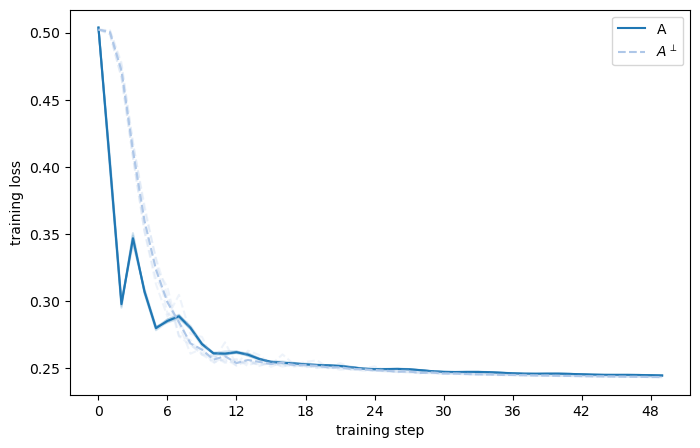

In [27]:
plot_comparison_training('A', '$A^{\perp}$', save=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2676929/1072182145.py:1: SyntaxWarning: invalid escape sequence '\p'
  plot_comparison_training('A(X)', '$A(X)^{\perp}$', save=False)


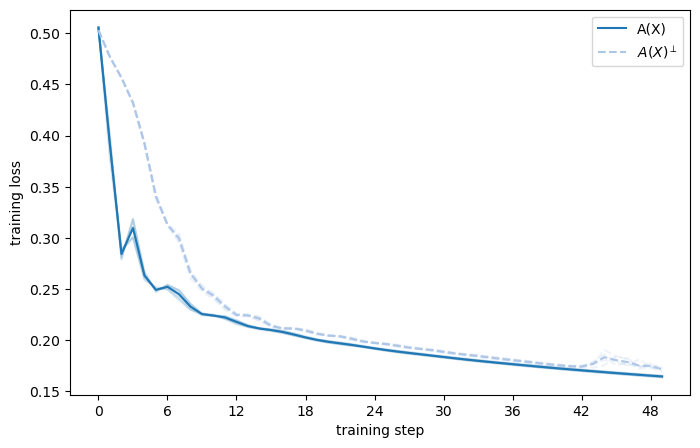

In [28]:
plot_comparison_training('A(X)', '$A(X)^{\perp}$', save=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2676929/427686630.py:1: SyntaxWarning: invalid escape sequence '\p'
  plot_comparison_training('A(X) + LN', '$A(X)^{\perp}$ + LN', save=False)


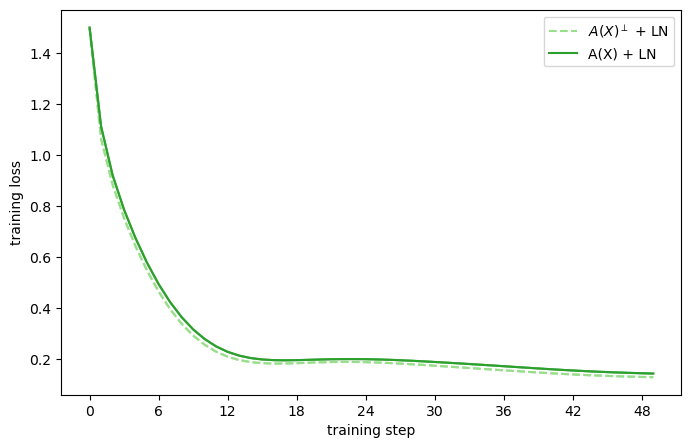

In [29]:
plot_comparison_training('A(X) + LN', '$A(X)^{\perp}$ + LN', save=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2676929/3323995280.py:1: SyntaxWarning: invalid escape sequence '\p'
  plot_comparison_training('A(X) + skip', '$A(X)^{\perp}$ + skip', save=False)


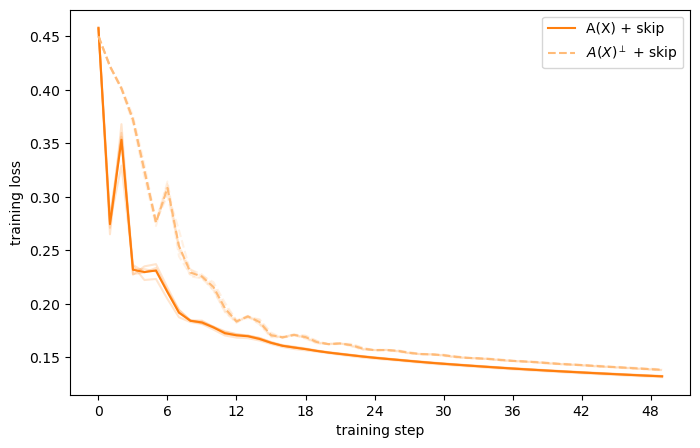

In [30]:
plot_comparison_training('A(X) + skip', '$A(X)^{\perp}$ + skip', save=False)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2676929/3430506289.py:1: SyntaxWarning: invalid escape sequence '\p'
  plot_comparison_training('A(X) + skip + LN', '$A(X)^{\perp}$ + skip + LN', save=False)


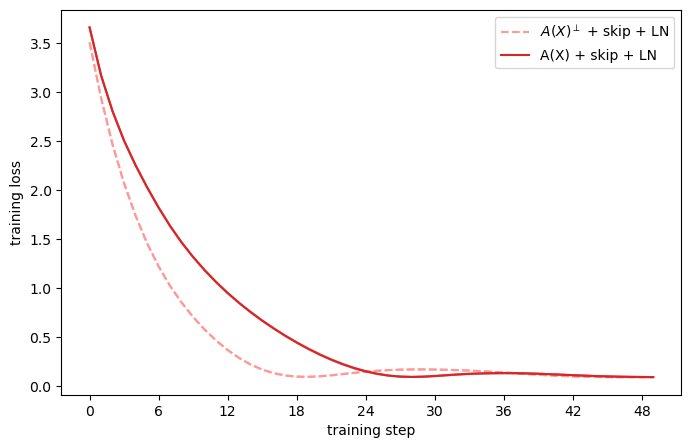

In [31]:
plot_comparison_training('A(X) + skip + LN', '$A(X)^{\perp}$ + skip + LN', save=False)

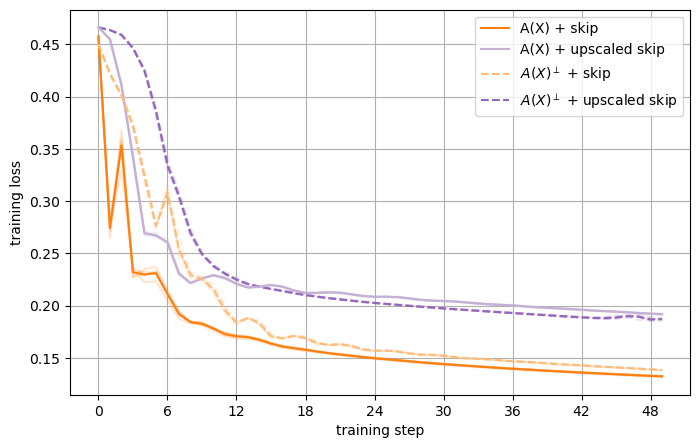

In [29]:
save = True
## plot 
fig, ax = plt.subplots(1,1,figsize=(8,5))
j = 0
y_max = 0

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if 'A(X)' in config and 'skip' in config and 'LN' not in config:
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config, linestyle=linestyle, color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle=linestyle, color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if 'A(X) + upscaled skip' in config:
        if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')


ax.set_xlabel('training step')
ax.set_ylabel('training loss')


if save is True:

    directory_path = (
            Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
            )
    file_model = open(directory_path / 'config_model.pkl','rb')
    file_training = open(directory_path / 'config_training.pkl','rb')

    model_config = pickle.load(file_model)
    train_config = pickle.load(file_training)
    directory_output_path = Path(Path().absolute()) / "figs"  / "training"
    directory_output_path.mkdir(exist_ok=True, parents=True)
    plt.grid(True)


    #conf_A = conf_A.replace('{\perp}', '{perp}')
    #conf_B = conf_B.replace('{\perp}', '{perp}')
    handles, labels = plt.gca().get_legend_handles_labels() 
    
    #order=[0,3,1,2]

    order=[0,2,3,1]
    ax.legend([handles[i] for i in order], [labels[i] for i in order]) 
    fig.savefig(directory_output_path / "skip_VS_upscaled_skip_1layer.pdf", format="pdf", dpi=300)

else:
    plt.show(fig)
#ax.set_yscale('log')
#ax.set_title(f"$T={train_config['seq_length']}$")

#legend_without_duplicate_labels(ax)
#fig.savefig('test.pdf',format="pdf", dpi=300)


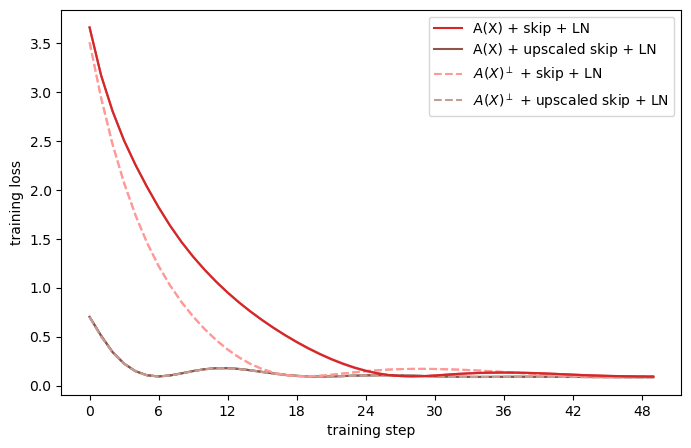

In [49]:
save = True
## plot 
fig, ax = plt.subplots(1,1,figsize=(8,5))
j = 0
y_max = 0

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if 'A(X)' in config and 'skip' in config and 'LN' in config:
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config, linestyle=linestyle, color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle=linestyle, color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if 'A(X) + upscaled skip' in config:
        if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')


ax.set_xlabel('training step')
ax.set_ylabel('training loss')


if save is True:

    directory_path = (
            Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
            )
    file_model = open(directory_path / 'config_model.pkl','rb')
    file_training = open(directory_path / 'config_training.pkl','rb')

    model_config = pickle.load(file_model)
    train_config = pickle.load(file_training)
    directory_output_path = Path(Path().absolute()) / "figs"  / "training"
    directory_output_path.mkdir(exist_ok=True, parents=True)

    #conf_A = conf_A.replace('{\perp}', '{perp}')
    #conf_B = conf_B.replace('{\perp}', '{perp}')
    handles, labels = plt.gca().get_legend_handles_labels() 
    
    order = [3, 0, 2, 1]

    ax.legend([handles[i] for i in order], [labels[i] for i in order]) 

    fig.savefig(directory_output_path / "upscaledskip_VS_skip_AXskip_1layer.pdf", format="pdf", dpi=300)

else:
    plt.show(fig)
#ax.set_yscale('log')
#ax.set_title(f"$T={train_config['seq_length']}$")

#legend_without_duplicate_labels(ax)
#fig.savefig('test.pdf',format="pdf", dpi=300)


In [30]:
### comparison xavier/non-xavier 

exp_name_xavier = 'Oobgj+mCT4xQTGTGSH+pgASODmBmCoQB1EIl6AuZJgc='
# 2 layer T = 500 normal with good lr grid VllxusmteXmexaUqGJnl+SyfTw3E27ibq6xlcsX7CqU=
# 2 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid Oobgj+mCT4xQTGTGSH+pgASODmBmCoQB1EIl6AuZJgc=

# 5 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid BYKf0aI1sYmQeFcRiS0z7bsWQ+f++X0NJHBF4SWBf5s=
# 1 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid oG8Os4r6y5XT4ARJ+dNDmlCJb0kdHBMH9AUDEZFTBes=
# 1 layer heaviside T = 500 with good lr grid +XqTe1VBl1pJT2nAEXHaxNNxCJPfZmvynFDtZpbPEw0=
# 5 layer heaviside T = 500 with good lr grid 37+4osEMmhwnAX96MW+Km3n79JIflWUOtJQrZYD+6A0=
# 5 layer heaviside T = 500 jumB4VSgDHIbVF5YoZDmNlc1IpaBxXnCUk3DyjWPhCg=
# one layer heaviside T = 500 qch1KDmXTauSSVAUeKAqIRp7J2kQivubBoSNYHzPWeU=
# one_layer expanded sigmoid = bRsDMtpuCLN0GHYse+8XVNqVcC875psfqRTD5WwEKvE=
# expanded sigmoid = 6lsOZiV1yJrw6YwOLkKqAZTQ1U+AKjK2+3WC3jZypZ4=
directory_path_xavier = (
        Path(Path().absolute()) / "results" / "loss" / exp_name_xavier
    ).glob('**/*.csv')
files_xavier = [x for x in directory_path_xavier if x.is_file()]

## how to get the one with best learning rate for each curve?
## getting the training losses for all different settings with fixed lr as arrays (n_simulation, n_epochs_performed)

df_losses = {}
dict_loss_xavier = {}
for f in files_xavier:
    conf_name = str(Path(f).parts[-2])
     
    #print('conf name ', conf_name)
    df_losses[conf_name] = pd.read_csv(Path(f))
    list_lr = df_losses[conf_name]['lr'].unique()
    n_epochs = df_losses[conf_name]["n_epochs"].values[0]
    n_simulations = df_losses[conf_name]['sim'].nunique()
    n_training_steps = n_epochs * (int(train_config['n_training_data']/train_config['batch_size']) +1)
    array_loss=np.empty((len(list_lr), n_simulations, n_training_steps))

    for k in range(len(list_lr)):
        df = df_losses[conf_name].loc[(df_losses[conf_name]['lr'] == list_lr[k])]


        for sim in range(n_simulations):
            try:
                n_steps_performed = len(json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0]))
                array_loss[k, sim,:n_steps_performed] = json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0])

            except: 
                continue

    dict_loss_xavier[conf_name] = array_loss

upper_threshold = 5
lower_threshold = 1e-3
non_trainable_loss_value = 3
dict_best_loss_xavier, dict_lr_best_loss_xavier, masked_best_lr_loss_xavier, nb_trainable_loss_xavier = {}, {}, {}, {}

for f in files_xavier:
    conf_name = str(Path(f).parts[-2])
    ## fitler losses which are very large still at the end of training
    ## and the ones that are very low at the start of training
    filter_losses = (dict_loss_xavier[conf_name][:,:,-1]>=upper_threshold) + (dict_loss_xavier[conf_name][:,:,0]<=lower_threshold + ((np.isnan(dict_loss_xavier[conf_name].sum(axis=-1)) )) )

    dict_loss_xavier[conf_name][filter_losses,:] = non_trainable_loss_value

    nb_filtered_losses = filter_losses.sum(axis=1)
    #candidates = dict_loss_xavier[conf_name][np.where( nb_filtered_losses == np.minimum(nb_filtered_losses))]
    masked_losses = np.ma.array(dict_loss_xavier[conf_name][:,:,-1], mask=filter_losses)
    avg_performance_trainable_losses =np.ma.mean(masked_losses, axis=1)
    

    ordering = np.lexsort((avg_performance_trainable_losses, nb_filtered_losses))
    idx_best_lr_loss = ordering[0]
    best_loss_all_considered = dict_loss_xavier[conf_name][idx_best_lr_loss]
    best_lr_loss = dict_loss_xavier[conf_name][idx_best_lr_loss,:,:]
    filter_best_loss = np.repeat(filter_losses[idx_best_lr_loss, np.newaxis], n_epochs, axis=1)
    masked_best_lr_losses = np.ma.array(dict_loss_xavier[conf_name][idx_best_lr_loss,:,:], mask=filter_best_loss)

    dict_lr_best_loss_xavier[conf_name] = list_lr[idx_best_lr_loss]
    dict_best_loss_xavier[conf_name] = best_lr_loss
    masked_best_lr_loss_xavier[conf_name] = masked_best_lr_losses
    nb_trainable_loss_xavier[conf_name] = nb_filtered_losses[idx_best_lr_loss]



In [31]:
### comparison xavier/non-xavier 

exp_name = 'VllxusmteXmexaUqGJnl+SyfTw3E27ibq6xlcsX7CqU='
# 2 layer T = 500 normal with good lr grid VllxusmteXmexaUqGJnl+SyfTw3E27ibq6xlcsX7CqU=
# 5 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid BYKf0aI1sYmQeFcRiS0z7bsWQ+f++X0NJHBF4SWBf5s=
# 1 layer heaviside T = 500 XAVIER NORMAL FOR KEYS/QUERIES with good lr grid oG8Os4r6y5XT4ARJ+dNDmlCJb0kdHBMH9AUDEZFTBes=
# 1 layer heaviside T = 500 with good lr grid +XqTe1VBl1pJT2nAEXHaxNNxCJPfZmvynFDtZpbPEw0=
# 5 layer heaviside T = 500 with good lr grid 37+4osEMmhwnAX96MW+Km3n79JIflWUOtJQrZYD+6A0=
# 5 layer heaviside T = 500 jumB4VSgDHIbVF5YoZDmNlc1IpaBxXnCUk3DyjWPhCg=
# one layer heaviside T = 500 qch1KDmXTauSSVAUeKAqIRp7J2kQivubBoSNYHzPWeU=
# one_layer expanded sigmoid = bRsDMtpuCLN0GHYse+8XVNqVcC875psfqRTD5WwEKvE=
# expanded sigmoid = 6lsOZiV1yJrw6YwOLkKqAZTQ1U+AKjK2+3WC3jZypZ4=
directory_path = (
        Path(Path().absolute()) / "results" / "loss" / exp_name
    ).glob('**/*.csv')
files = [x for x in directory_path if x.is_file()]

## how to get the one with best learning rate for each curve?
## getting the training losses for all different settings with fixed lr as arrays (n_simulation, n_epochs_performed)

df_losses = {}
dict_loss = {}
for f in files:
    conf_name = str(Path(f).parts[-2])
     
    #print('conf name ', conf_name)
    df_losses[conf_name] = pd.read_csv(Path(f))
    list_lr = df_losses[conf_name]['lr'].unique()
    n_epochs = df_losses[conf_name]["n_epochs"].values[0]
    n_simulations = df_losses[conf_name]['sim'].nunique()
    n_training_steps = n_epochs * (int(train_config['n_training_data']/train_config['batch_size']) +1)
    array_loss=np.empty((len(list_lr), n_simulations, n_training_steps))

    for k in range(len(list_lr)):
        df = df_losses[conf_name].loc[(df_losses[conf_name]['lr'] == list_lr[k])]


        for sim in range(n_simulations):
            try:
                n_steps_performed = len(json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0]))
                array_loss[k, sim,:n_steps_performed] = json.loads(df.loc[df['sim'] == sim]['train_loss'].values[0])

            except: 
                continue

    dict_loss[conf_name] = array_loss

upper_threshold = 5
lower_threshold = 1e-3
non_trainable_loss_value = 3
dict_best_loss, dict_lr_best_loss, masked_best_lr_loss, nb_trainable_loss = {}, {}, {}, {}

for f in files:
    conf_name = str(Path(f).parts[-2])
    ## fitler losses which are very large still at the end of training
    ## and the ones that are very low at the start of training
    filter_losses = (dict_loss[conf_name][:,:,-1]>=upper_threshold) + (dict_loss[conf_name][:,:,0]<=lower_threshold + ((np.isnan(dict_loss[conf_name].sum(axis=-1)) )) )

    dict_loss[conf_name][filter_losses,:] = non_trainable_loss_value

    nb_filtered_losses = filter_losses.sum(axis=1)
    #candidates = dict_loss[conf_name][np.where( nb_filtered_losses == np.minimum(nb_filtered_losses))]
    masked_losses = np.ma.array(dict_loss[conf_name][:,:,-1], mask=filter_losses)
    avg_performance_trainable_losses =np.ma.mean(masked_losses, axis=1)
    

    ordering = np.lexsort((avg_performance_trainable_losses, nb_filtered_losses))
    idx_best_lr_loss = ordering[0]
    best_loss_all_considered = dict_loss[conf_name][idx_best_lr_loss]
    best_lr_loss = dict_loss[conf_name][idx_best_lr_loss,:,:]
    filter_best_loss = np.repeat(filter_losses[idx_best_lr_loss, np.newaxis], n_epochs, axis=1)
    masked_best_lr_losses = np.ma.array(dict_loss[conf_name][idx_best_lr_loss,:,:], mask=filter_best_loss)

    dict_lr_best_loss[conf_name] = list_lr[idx_best_lr_loss]
    dict_best_loss[conf_name] = best_lr_loss
    masked_best_lr_loss[conf_name] = masked_best_lr_losses
    nb_trainable_loss[conf_name] = nb_filtered_losses[idx_best_lr_loss]



<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_262298/2216552244.py:7: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X)" or config=="$A(X)^{\perp}$":
/tmp/ipykernel_262298/2216552244.py:43: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X)" or config=="$A(X)^{\perp}$":
/tmp/ipykernel_262298/2216552244.py:49: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X)" or config=="$A(X)^{\perp}$":
/tmp/ipykernel_262298/2216552244.py:85: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X)" or config=="$A(X)^{\perp}$":


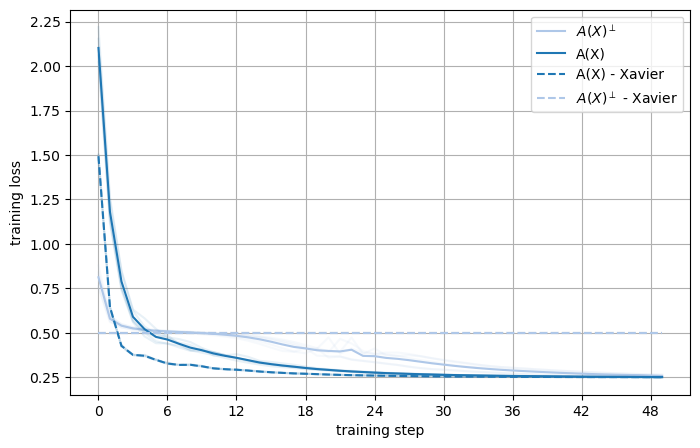

In [32]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
save = True
j = 0
y_max = 0

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X)" or config=="$A(X)^{\perp}$":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config, linestyle='-', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='-', color=colors[colors_idx[config]], alpha=0.1)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X)" or config=="$A(X)^{\perp}$":
        if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X)" or config=="$A(X)^{\perp}$":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config + ' - Xavier', linestyle='--', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='--', color=colors[colors_idx[config]], alpha=0.1)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X)" or config=="$A(X)^{\perp}$":
        if (np.abs(dict_best_loss_xavier[config] - non_trainable_loss_value)< 1e-5).all():
            print('printing the line for xavier')

            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="dashed")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')



ax.set_xlabel('training step')
ax.set_ylabel('training loss')


if save is True:

    directory_path = (
            Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
            )
    file_model = open(directory_path / 'config_model.pkl','rb')
    file_training = open(directory_path / 'config_training.pkl','rb')

    model_config = pickle.load(file_model)
    train_config = pickle.load(file_training)
    directory_output_path = Path(Path().absolute()) / "figs"  / "training"
    directory_output_path.mkdir(exist_ok=True, parents=True)
    plt.grid(True)

    fig.savefig(directory_output_path / f"xavier_VS_normalAX_VS_AX_1layer.pdf", format="pdf", dpi=300)

else:
    plt.show(fig)

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_546514/3380923897.py:7: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
/tmp/ipykernel_546514/3380923897.py:43: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
/tmp/ipykernel_546514/3380923897.py:49: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
/tmp/ipykernel_546514/3380923897.py:85: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":


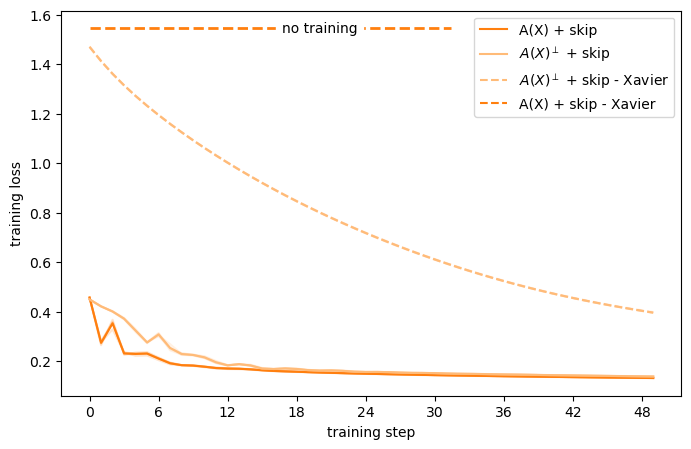

In [43]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
save = True
j = 0
y_max = 0

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config, linestyle='-', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='-', color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
        if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config + ' - Xavier', linestyle='--', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='--', color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X) + skip" or config=="$A(X)^{\perp}$ + skip":
        if (np.abs(dict_best_loss_xavier[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="dashed")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')



ax.set_xlabel('training step')
ax.set_ylabel('training loss')


if save is True:

    directory_path = (
            Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
            )
    file_model = open(directory_path / 'config_model.pkl','rb')
    file_training = open(directory_path / 'config_training.pkl','rb')

    model_config = pickle.load(file_model)
    train_config = pickle.load(file_training)
    directory_output_path = Path(Path().absolute()) / "figs"  / "training"
    directory_output_path.mkdir(exist_ok=True, parents=True)


    fig.savefig(directory_output_path / f"xavier_VS_normal_AXskip_1layer.pdf", format="pdf", dpi=300)

else:
    plt.show(fig)

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_546514/415678870.py:7: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
/tmp/ipykernel_546514/415678870.py:43: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
/tmp/ipykernel_546514/415678870.py:49: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
/tmp/ipykernel_546514/415678870.py:85: SyntaxWarning: invalid escape sequence '\p'
  if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":


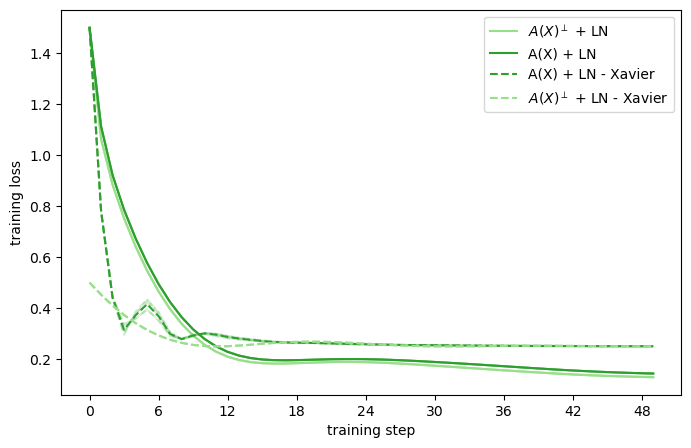

In [44]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
save = True
j = 0
y_max = 0

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config, linestyle='-', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='-', color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss.items()):
    if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
        if (np.abs(dict_best_loss[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="solid")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
        linestyle = linestyles[config]
        ax.plot((loss).mean(axis=0), label=config + ' - Xavier', linestyle='--', color=colors[colors_idx[config]])
        #ax.scatter(loss.mean(axis=0), color=color)
        #axs[i].fill_between(np.arange(1,n_layers+1),
        #                    loss[i,:,idx_T,:].mean(axis=0) - 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    loss[i,:,idx_T,:].mean(axis=0) + 1.96* loss[i,:,idx_T,:].std(axis=0),
        #                    color=color,
        #                    alpha=0.2
        #)
        for i in range(loss.shape[0]):
            ax.plot(loss[i], linestyle='--', color=colors[colors_idx[config]], alpha=0.2)

        try:
            max_loss = np.ma.max(loss)
        except:
            max_loss = 0
        if max_loss > y_max:
            y_max = max_loss

        if nb_trainable_loss[config] > 0:
            lines = ax.get_lines()
            l1 = lines[-1]
            labelLine(l1, 10 + 5 * j, label=f"{nb_trainable_loss[config]}")
            j += 1

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.legend(loc='center right')
leg = ax.legend()
fig.set_facecolor('white')
fig.canvas.draw()
#plt.pause(0.0001)

x_legend, y_legend = ax.transData.inverted().transform(leg.get_window_extent())

for _, (config, loss) in enumerate(masked_best_lr_loss_xavier.items()):
    if config=="A(X) + LN" or config=="$A(X)^{\perp}$ + LN":
        if (np.abs(dict_best_loss_xavier[config] - non_trainable_loss_value)< 1e-5).all():
            ax.hlines(y_max*(1.05), 0, x_legend[0] - 2,linewidth=2, color=colors[colors_idx[config]], linestyles="dashed")
            ax.text(20, y_max * (1.05), 'no training', fontsize=10, va='center', ha='center', backgroundcolor='w')



ax.set_xlabel('training step')
ax.set_ylabel('training loss')


if save is True:

    directory_path = (
            Path(Path().absolute()) / "results" / "loss" / exp_name/ "A"
            )
    file_model = open(directory_path / 'config_model.pkl','rb')
    file_training = open(directory_path / 'config_training.pkl','rb')

    model_config = pickle.load(file_model)
    train_config = pickle.load(file_training)
    directory_output_path = Path(Path().absolute()) / "figs"  / "training"
    directory_output_path.mkdir(exist_ok=True, parents=True)


    fig.savefig(directory_output_path / f"xavier_VS_normal_AXLN_1layer.pdf", format="pdf", dpi=300)

else:
    plt.show(fig)